<a href="https://colab.research.google.com/github/dondreojordan/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')


In [ ]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

apt = df.copy()

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df.replace({'?': np.Nan}).isnull().sum()
# module 'numpy' has no attribute 'Nan'. Translation no '?'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48817 non-null  float64
 1   bedrooms              48817 non-null  int64  
 2   created               48817 non-null  object 
 3   description           47392 non-null  object 
 4   display_address       48684 non-null  object 
 5   latitude              48817 non-null  float64
 6   longitude             48817 non-null  float64
 7   price                 48817 non-null  int64  
 8   street_address        48807 non-null  object 
 9   interest_level        48817 non-null  object 
 10  elevator              48817 non-null  int64  
 11  cats_allowed          48817 non-null  int64  
 12  hardwood_floors       48817 non-null  int64  
 13  dogs_allowed          48817 non-null  int64  
 14  doorman               48817 non-null  int64  
 15  dishwasher         

In [ ]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000
mean,1.201794,1.537149,40.750760,-73.972760,3579.585247,0.524838,0.478276,0.478276,0.447631,0.424852,0.415081,0.367085,0.052769,0.268452,0.185653,0.175902,0.132761,0.138394,0.102833,0.087203,0.060471,0.055206,0.051908,0.046193,0.043305,0.042711,0.039331,0.027224,0.026241
std,0.470711,1.106087,0.038954,0.028883,1762.430772,0.499388,0.499533,0.499533,0.497255,0.494326,0.492741,0.482015,0.223573,0.443158,0.388830,0.380741,0.339320,0.345317,0.303744,0.282136,0.238359,0.228385,0.221844,0.209905,0.203544,0.202206,0.194382,0.162738,0.159852
min,0.000000,0.000000,40.575700,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# What I need to know: "predict how much (target) it costs to rent an apartment in NYC (with features)."

y = apt['price']
y.shape

(48817,)

In [ ]:
X = apt.drop('price', axis=1)
X.shape

(48817, 33)

In [ ]:
y.head(3)

0    3000
1    5465
2    2850
Name: price, dtype: int64

In [ ]:
X.head(3)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- [ X ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
'

In [ ]:
# X['created'] = pd.to_datetime(X['created'], infer_datetime_format=True)

In [ ]:
# X_test = X[X['created'] >= '2016-06-01 00:00:00']
# y_test = y[y.index.isin(X_test.index)]

#May not work becuase of the string. 

In [ ]:
# Train is April and May
Train = df[df['created'].str.contains("2016-04|2016-05")==True]
# Test is June
Test = df[df['created'].str.contains("2016-06")]
# Testing Dataset
print('Testing Dataset: ',Train)
print('Testing Dataset: ',Test)

Testing Dataset:         bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
2            1.0         1  ...                 0                    0
3            1.0         1  ...                 0                    0
4            1.0         4  ...                 0                    0
5            2.0         4  ...                 0                    0
6            1.0         2  ...                 0                    0
...          ...       ...  ...               ...                  ...
49346        1.0         1  ...                 0                    0
49348        1.0         1  ...                 0                    1
49349        1.0         1  ...                 0                    0
49350        1.0         0  ...                 0                    0
49351        1.0         2  ...                 0                    0

[31844 rows x 34 columns]
Testing Dataset:         bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0            1

- [ X ] Engineer at least two new features. (See below for explanation & ideas.)

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

In [ ]:
# Total Number of rooms
X['total_rooms'] = X['bathrooms'] + X['bedrooms']

In [ ]:
# Total number of amenities outdoors
X['total_outdoor_amenities'] = X['balcony']+X['common_outdoor_space']+X['garden_patio']+X['outdoor_space']+X['terrace']+X['swimming_pool']+X['roof_deck']

In [ ]:
X.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,total_rooms,total_outdoor_amenities
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0


- [ ] Fit a linear regression model with at least two features.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# Instantiate the class
model_2f = LinearRegression()
# Make features and target
features = ['cats_allowed','dogs_allowed','latitude','longitude']
target = ['price']
print(f'Linear Regression, dependent on: {features}')
print(f'Linear Regression, independent on: {target}')
# Make train data
x_train = Train[features]
y_train = Train[target]
# Make test data
x_test = Test[features]
y_test = Test[target]
# Fit  the data to the model
model_2f.fit(x_train, y_train)


Linear Regression, dependent on: ['cats_allowed', 'dogs_allowed', 'latitude', 'longitude']
Linear Regression, independent on: ['price']


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#test train data
train_pred = model_2f.predict(x_train)
#find our mean abs error aka accuracy
mae_train = mean_absolute_error(y_train,train_pred)
#train test data 
test_pred = model_2f.predict(x_test)
#find mean abs error
mae_test = mean_absolute_error(y_test,test_pred)
#compare results
print(f'MAE Train Error off by ${mae_train:.2f}.')
print(f'MAE Test Error off by ${mae_test:.2f}.')

MAE Train Error off by $1144.58.
MAE Test Error off by $1137.85.


In [ ]:
# Think about: How does the error compare to the prior model?

- [ ] Get the model's coefficients and intercept.

In [ ]:
# State the coefficients and the intercept
model_2f.intercept_, model_2f.coef_

(array([-1272124.71285601]),
 array([[   -78.80547882,    224.21403822,   2232.42504878,
         -16014.85815949]]))

In [ ]:
print('Intercept', model_2f.intercept_)
coefficients = pd.Series(model_2f.coef_.flatten(), features)
print(coefficients.to_string())

# Should match with the above cell

Intercept [-1272124.71285601]
cats_allowed      -78.805479
dogs_allowed      224.214038
latitude         2232.425049
longitude      -16014.858159


- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# test data
rmse = sqrt(mean_squared_error(y_test, test_pred))
print(f' root mean squared error test: {rmse}')
# train data 
rmse = sqrt(mean_squared_error(y_train, train_pred))
print(f' root mean squared error train: {rmse}')

 root mean squared error test: 1701.110406213075
 root mean squared error train: 1702.529205728456


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,test_pred)
print(f' R2 score for test: {r2}')
r2 = r2_score(y_train,train_pred)
print(f' R2 score for train: {r2}')

 R2 score for test: 0.06893281456667055
 R2 score for train: 0.06648007909991394


In [ ]:
#mean abs error
print(f'train error: ${mae_train:.2f} off')
print(f'test error: ${mae_test:.2f} off')

train error: $1144.58 off
test error: $1137.85 off


- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!

- [ ] As always, commit your notebook to your fork of the GitHub repo.

## Stretch Goals

- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

#Dondre' After Hours Study Session DS 211 Notes
Instructor: Keri Kalmbach, March 10, 2020

``
**Objective:** Ordinary Least Squares Regression is the most basic model in the Machine Learning (ML) toolkit. It is the basis for mathematical prediction of unknown (or unobserved) values and is the inspiration of many ML models.
``

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

NY = df.copy()

In [ ]:
print(NY.shape)
print(NY.info())
print(NY.isnull().sum())
NY.head(5)
#Exploration.

(48817, 34)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48817 non-null  float64
 1   bedrooms              48817 non-null  int64  
 2   created               48817 non-null  object 
 3   description           47392 non-null  object 
 4   display_address       48684 non-null  object 
 5   latitude              48817 non-null  float64
 6   longitude             48817 non-null  float64
 7   price                 48817 non-null  int64  
 8   street_address        48807 non-null  object 
 9   interest_level        48817 non-null  object 
 10  elevator              48817 non-null  int64  
 11  cats_allowed          48817 non-null  int64  
 12  hardwood_floors       48817 non-null  int64  
 13  dogs_allowed          48817 non-null  int64  
 14  doorman               48817 non-null  int64  
 15  dishwas

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Train/Test Split

Spit the data in two sets:

    1. Train on dates from April to May 2016
    2.Test on dates in June 2016

In [ ]:
# Train is April and May
#Column contains strings and object unless you use dateime format
train = df[df['created'].str.contains("2016-04|2016-05")==True] 

# Test is June
#Column contains strings and objects unless you use dateime format
test = df[df['created'].str.contains("2016-06")]


print("Number of observations (rows): ", train.shape)
print("Number of observations (rows): ", test.shape)

Number of observations (rows):  (31844, 34)
Number of observations (rows):  (16973, 34)


In [ ]:
train.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1.0,1,2016-06-03 03:21:22,Check out this one bedroom apartment in a grea...,W. 173rd Street,40.8448,-73.9396,1675,644 W. 173rd Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,1.0,1,2016-06-01 03:11:01,Spacious 1-Bedroom to fit King-sized bed comfo...,East 56th St..,40.7584,-73.9648,3050,315 East 56th St..,low,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,2.0,4,2016-06-07 04:39:56,SPRAWLING 2 BEDROOM FOUND! ENJOY THE LUXURY OF...,W 18 St.,40.7391,-73.9936,7400,30 W 18 St.,medium,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0


In [ ]:
y1 = NY['price']
X1 = NY.drop('price', axis=1)
print(X1.shape)
print(X1.head(1))
print(y1.shape)
print(y1.head(1))

(48817, 33)
   bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0

[1 rows x 33 columns]
(48817,)
0    3000
Name: price, dtype: int64


##(SKIP)3-Series cross-validation

In [ ]:
#3-split time seris cross-validation (Not needed for now)(SKIP)
#from sklearn.model_selection import TimeSeriesSplit

#tscv = TimeSeriesSplit(n_splits=3)
#print(tscv)
#for train, test in tscv.split(X1):
#  print("%s %s" % (train, test))



    So far, we have split the data into two parts: one for training the data between the months of April and May 2016, and one for testing data in the month of June 2016.

    NOW, fit it to a model.

    In order to do this there are 3 steps:
    - Begin with baseline (0 features)
      > Baseline is the average.
        -Regression tasks are an average value.
        -Classification is the porportion of the majority class baseline.
    - Simple Regression (1 feature)
    >
    - Multiple Regression (2 features)
      >

#Multiple Regression. 

###Begin with baseline (0 features)

What is the average price to rent an apartment during April and May 2016?

In [ ]:
#y1 = NY['price'] remember

NY_mean = NY['price'].mean()
guess = y1.mean()
print("NY Data Set Price Average: ", NY_mean)
print("\nVersus\n")
print("Basline or average:", guess)

NY Data Set Price Average:  3579.5852469426636

Versus

Basline or average: 3579.5852469426636


What if we guessed this number for every election? How far off would this be on average?

In [ ]:
#Arrange y target vector or array
target = 'price'
y_train = train[target]
y_test = test[target]

In [ ]:
#Get mean baseline
print("Mean Baseline (using 0 features)")
guess


Mean Baseline (using 0 features)


3579.5852469426636

In [ ]:
#Calculate Training Error
from sklearn.metrics import mean_absolute_error

y_train_pred = [guess] * len(y_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Train Error (April and May 2016): {mae_train:.2f} percentage points') 
#f-string format allows syntax with a string

Train Error (April and May 2016): 1202.99 percentage points


In [ ]:
#Calculate Test Error
y_test_pred = [guess] * len(y_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test Error (June 2016): {mae_test:.2f} percentage points')
#f-string format allows syntax with a string

Test Error (June 2016): 1198.81 percentage points


###Simple Linear Regression (Only 1 Feature)
      Make a scatterplot showing the relationship between 1 **feature** and the only **target**
      -Use any 1 feature(for example: **longitude**)

In [ ]:
train.describe().nunique()

bathrooms               6
bedrooms                7
latitude                8
longitude               8
price                   8
elevator                5
cats_allowed            5
hardwood_floors         5
dogs_allowed            5
doorman                 5
dishwasher              5
no_fee                  5
laundry_in_building     5
fitness_center          5
pre-war                 5
laundry_in_unit         5
roof_deck               5
outdoor_space           5
dining_room             5
high_speed_internet     5
balcony                 5
swimming_pool           5
new_construction        5
terrace                 5
exclusive               5
loft                    5
garden_patio            5
wheelchair_access       5
common_outdoor_space    5
dtype: int64

In [ ]:
import pandas as pd
import plotly.express as px

px.scatter(
    train,
    x='longitude',
    y='price',
    text='price', # Not a second feature, use to determine the text on the graph.
    title='NY Apartment Renting Prices, \nApril to May 2016 with one feature',
    trendline='ols', #Ordinary Least Squares
)

#Hover over a point on the line and look at the R2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



###Fit the simple regression with one feature. Use scikit-learn
    5 step process

In [ ]:
#1. Import the estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [ ]:
#2. Instantiate the class
model = LinearRegression() # Make sure you add the () to LR please

In [ ]:
#3. Arrange X FEATURES matrices and y target vectors(already did y-target vectors)
features = ['longitude']
X_train = train[features]
X_test = test[features]
print(f'Linear Regrerssion, dependent on: {features}')

Linear Regrerssion, dependent on: ['longitude']


In [ ]:
#Fit the model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
mae_onefeat_train = mean_absolute_error(y_test, y_test_pred)
print(f'Training Error: {mae_onefeat_train:.2f} percentage points with one feature')

Training Error: 1198.81 percentage points with one feature


In [ ]:
#Apply the model to the data
y_pred = model.predict(X_test)
mae_onefeat_test = mean_absolute_error(y_test, y_pred)
print(f'Testing Error: {mae_onefeat_test:.2f} percentage points with one feature')

Testing Error: 1138.53 percentage points with one feature


How does the error compare to the baseline (0 features, below cell) just by adding one feature?

In [ ]:
#Calculate Training Error
from sklearn.metrics import mean_absolute_error

y_train_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_train_pred)
print(f'Train Error (April and May 2016): {mae:.2f} percentage points') 
print(f'Train Error (April and May 2016): {mae_onefeat_train:.2f} percentage points with one feature')
#f-string format allows syntax with a string

Train Error (April and May 2016): 1202.99 percentage points
Train Error (April and May 2016): 1198.81 percentage points with one feature


In [ ]:
#Calculate Test Error
y_test_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test Error (June 2016): {mae:.2f} percentage points')
print(f'Test Error (June 2016): {mae_onefeat_test:.2f} percentage points with one feature')
#f-string format allows syntax with a string

Test Error (June 2016): 1198.81 percentage points
Test Error (June 2016): 1138.53 percentage points with one feature


###Multiple Regression
    Make a scatterplot to show the relationship between any 2 features and the target.
    What's the difference between April/May 2016 and June 2016?

In [ ]:
#px.scatter_3d(
    #train,
    #x='longitude',
    #y='price',
    #z='latitude',
    #text='price', 
    #title='NY Apartment Renting Prices, \nApril to May 2016 with two features(3D)'
#)

Fit multiple regression with two features.

In [ ]:
target = 'price'
#Re-arragnge X features matrices now with two features
features = ['longitude', 
            'latitude']
print(f'Linear Regression with two features, dependent on: {features}')

X_train = train[features] 
X_test = test[features]
y_train = train[target]
y_test = test[target]


#The difference between little and big X
#x is a vector or array
#X is a matrix or having multiple features

Linear Regression with two features, dependent on: ['longitude', 'latitude']


In [ ]:
#Fit the model

model.fit(X_train, y_train)

#Calculate train error
y_pred = model.predict(X_train)
mae_twofeat_train = mean_absolute_error(y_train, y_pred)

print(f'Train Error (April and May 2016): {mae:.2f} percentage points') 
print(f'Train Error (April and May 2016): {mae_onefeat_train:.2f} percentage points with one feature')
print(f'Train Error (April and May 2016): {mae_twofeat_train:.2f} percentage points with two feature')

Train Error (April and May 2016): 1198.81 percentage points
Train Error (April and May 2016): 1198.81 percentage points with one feature
Train Error (April and May 2016): 1147.15 percentage points with two feature


In [ ]:
#Apply the model to new data (test data)
#Calculate test error
y_pred = model.predict(X_test)
mae_twofeat_test = mean_absolute_error(y_test, y_pred)

print(f'Test Error (June 2016): {mae:.2f} percentage points')
print(f'Test Error (June 2016): {mae_onefeat_test:.2f} percentage points with one feature')
print(f'Test Error (June 2016): {mae_twofeat_test:.2f} percentage points with two features')


Test Error (June 2016): 1198.81 percentage points
Test Error (June 2016): 1138.53 percentage points with one feature
Test Error (June 2016): 1139.70 percentage points with two features


###Plot the plane of best fit for two features and a traget on a 4D model.

In [ ]:
#Graphing purposes and can't visualize past 4-D

In [ ]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(NY, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [ ]:
#regression_3d(
 #   train,
  #  x='longitude',
   # y='price',
    #z='latitude',
    #text='price', 
    #title='NY Apartment Renting Prices, \nApril to May 2016 with two features(4D)'
#)

Get Intercept and Coefficients

Can you relate the intercept and ceoefficienctes to what you see in the plot above?

In [ ]:
model.intercept_, model.coef_

(-1285931.9851655466, array([-16215.70541389,   2208.18971896]))

In [ ]:
# This is easier to read
# This is easier to read
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept -1285931.9851655466
longitude   -16215.705414
latitude      2208.189719


What does the model predict if longitude growth=0% and latitude=0%?


In [ ]:
model.predict([[0, 0]]) #We get the intercept_

array([-1285931.98516555])

Longitude growth=1% (latitude=0%)?

In [ ]:
model.predict([[1, 0]])

array([-1302147.69057944])

Longitude growth=2% (latitude=0%)?

In [ ]:
model.predict([[2, 0]])

array([-1318363.39599334])

Longitude growth=0% (latitude=1%)?

In [ ]:
model.predict([[0, 1]])

array([-1283723.79544659])

Longitude growth=0% (latitude=2%)?

In [ ]:
model.predict([[0, 2]])

array([-1281515.60572763])

#Understand how ordinary least squares regression minimizes the sum of squared errors

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = NY[feature]
    y = NY[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    regmet_mse = mean_squared_error(y, y_pred)
    regmet_rmse = np.sqrt(regmet_mse)
    regmet_mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', regmet_mse)
    print('Root Mean Squared Error:', regmet_rmse)
    print('Mean Absolute Error:', regmet_mae)
    print('R^2:', r2)

Here's what the mean baseline looks like:

Mean Squared Error: 3106114.4480853886
Root Mean Squared Error: 1762.4172173709007
Mean Absolute Error: 1200.4304876374647
R^2: -5.102951728508387e-06


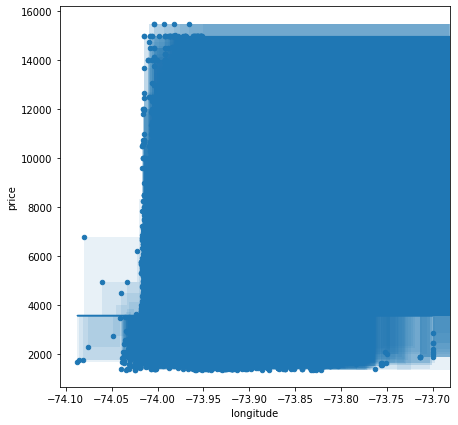

In [ ]:
feature = 'longitude'
squared_errors(train, feature, target, m=0, b=y_train.mean())

With that flat line, you can say that price is INDEPENDENT of longitiude.R2 is basically is 0. There is 0 percent relationship explained by the degrees in longitude. 

 let's guess & check some better values for the m (slope) & b (y-intercept)parameters:

Mean Squared Error: 3145576.115702128
Root Mean Squared Error: 1773.5772088358963
Mean Absolute Error: 1268.0416919372349
R^2: -0.012709679569003152


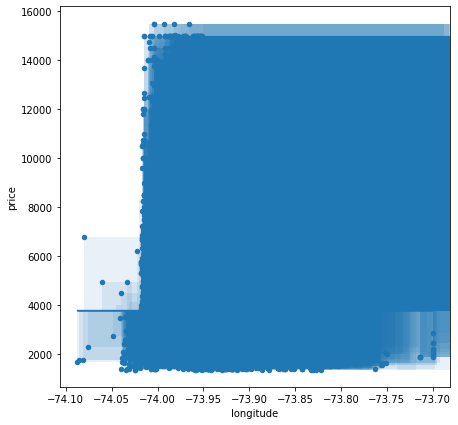

In [ ]:
squared_errors(train, feature, target, m=3, b=4000)

###Calculate our $\beta$ parameters with numpy!

In [ ]:
# This is NOT something you'll be tested on. It's just a demo.

# X is a matrix. Add column of constants for fitting the intercept.
def add_constant(X):
    constant = np.ones(shape=(len(X),1))
    return np.hstack((constant, X))
X = add_constant(train[features].values)
print('X')
print(X)

# y is a column vector
y = train[target].values[:, np.newaxis]
print('y')
print(y)

# Least squares solution in code
X_transpose = X.T
X_transpose_X = X_transpose @ X
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
X_transpose_y = X_transpose @ y
beta_hat = X_transpose_X_inverse @ X_transpose_y

print('Beta Hat')
print(beta_hat)

X
[[  1.     -74.0018  40.7388]
 [  1.     -73.9677  40.7539]
 [  1.     -73.9493  40.8241]
 ...
 [  1.     -73.99    40.7601]
 [  1.     -74.0101  40.7066]
 [  1.     -73.9172  40.8699]]
y
[[2850]
 [3275]
 [3350]
 ...
 [2595]
 [3350]
 [2200]]
Beta Hat
[[-1285931.97910213]
 [  -16215.70534565]
 [    2208.18969411]]


In [ ]:
# Scikit-learn gave the exact same results!
model.intercept_, model.coef_

(-1285931.9851655466, array([-16215.70541389,   2208.18971896]))

#Overfitting/Underfitting

> Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between bias and variance. Consider the following figure, which presents two regression fits to the same dataset:

>![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-bias-variance-2.png)

``
The model on the left attempts to find a straight-line fit through the data. Because the data are intrinsically more complicated than a straight line, the straight-line model will never be able to describe this dataset well. Such a model is said to _underfit_ the data: that is, it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has high _bias_.
``

Can you guess the other ?

> From the scores associated with these two models, we can make an observation that holds more generally:
>
>- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
>
>- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

>![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)

>The means of tuning the model complexity varies from model to model.

https://medium.com/@mp32445/understanding-bias-variance-tradeoff-ca59a22e2a83

###Make a Validation Curve by tuning a new type of model complexity: polynomial degrees in a linear regression.

In [ ]:
# Read NYC Tribeca condo sales data, from first 4 months of 2019.


# Arrange X features matrix & y target vector
features = ['bedrooms']
target = 'price'
X = NY[features]
y = NY[target]

In [ ]:
#Split the data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

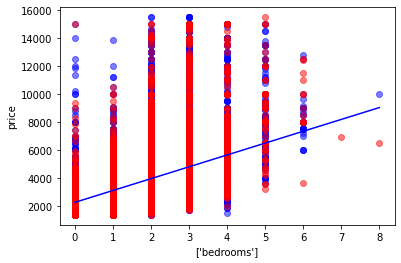

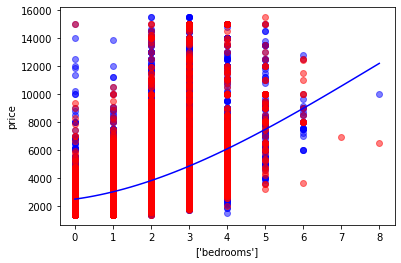

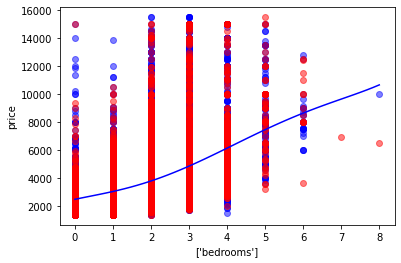

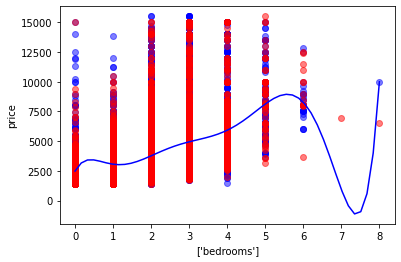

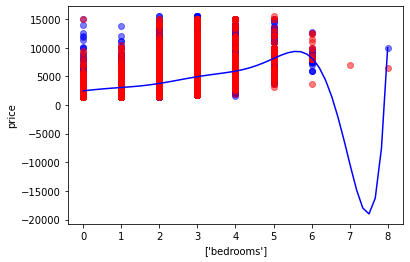

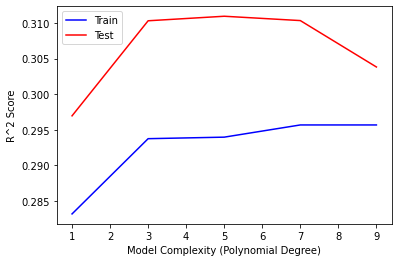

In [ ]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


# Credit for PolynomialRegression: Jake VanderPlas, Python Data Science Handbook, Chapter 5.3
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-curves-in-Scikit-Learn
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


polynomial_degrees = range(1, 10, 2)
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    display(HTML(f'Polynomial degree={degree}'))
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">Train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">Test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, [y_train], color='blue', alpha=0.5)
    plt.scatter(X_test, [y_test], color='red', alpha=0.5)
    plt.xlabel(features)
    plt.ylabel(target)
    
    x_domain = np.linspace(X.min(), X.max())
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    
display(HTML('Validation Curve'))
plt.plot(polynomial_degrees, train_r2s, color='blue', label='Train')
plt.plot(polynomial_degrees, test_r2s, color='red', label='Test')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

Resource:
https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

As model complexity increases, what happens to Train  R2  and Test  R2 ?

